# Can the film industry be a consistent profit center?


### Header Files

In [2]:
import gzip
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import seaborn as sns
import string
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

### Reading in the cleaned data 

In [3]:
df = pd.read_csv('Data/group_data.csv') #our cleaned dataframe
print(df.shape) #print shape of data frame
df.info()
df.head() #preview file

(4383, 18)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4383 entries, 0 to 4382
Data columns (total 18 columns):
id                           4383 non-null int64
release_date                 4383 non-null object
movie                        4383 non-null object
production_budget            4383 non-null int64
domestic_gross               4383 non-null int64
genres                       2102 non-null object
tconst                       2121 non-null object
runtime                      2000 non-null float64
popularity                   1843 non-null float64
year_released                4383 non-null int64
release_day                  4383 non-null object
release_month                4383 non-null object
domestic_gross_in_mill       4383 non-null float64
production_budget_in_mill    4383 non-null float64
domestic_net_in_mill         4383 non-null float64
Return_on_Investment         4383 non-null float64
release_day_num              4383 non-null int64
release_month_num            43

,id,release_date,movie,production_budget,domestic_gross,genres,tconst,runtime,popularity,year_released,release_day,release_month,domestic_gross_in_mill,production_budget_in_mill,domestic_net_in_mill,Return_on_Investment,release_day_num,release_month_num
0,1,2009-12-18,Avatar,425000000,760507625,Horror,tt1775309,93.0,26.526,2009,Friday,December,760.507625,425.0,335.507625,78.942971,18,12
1,3,2019-06-07,Dark Phoenix,350000000,42762350,"Action,Adventure,Sci-Fi",tt6565702,113.0,NaN,2019,Friday,June,42.762350,350.0,-307.237650,-87.782186,7,6
2,4,2015-05-01,Avengers: Age of Ultron,330600000,459005868,"Action,Adventure,Sci-Fi",tt2395427,141.0,44.383,2015,Friday,May,459.005868,330.6,128.405868,38.840250,1,5
3,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,NaN,NaN,NaN,NaN,2017,Friday,December,620.181382,317.0,303.181382,95.640815,15,12
4,6,2015-12-18,Star Wars Ep. VII: The Force Awakens,306000000,936662225,NaN,NaN,NaN,NaN,2015,Friday,December,936.662225,306.0,630.662225,206.098766,18,12


#### Reading in the cleaned data summary
The cleaned CSV has been imported to begin analysis with. The data has 4383 records and 16 columns. All data types seem to match up with the dataframe except for release date column which should be in datetime.

For steps on how data was cleaned please see the  "Data Cleaning Steps Notebook".

### Investigating the data

In [4]:
df['release_date'] =  pd.to_datetime(df['release_date'], infer_datetime_format=True) #convert to datetime data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4383 entries, 0 to 4382
Data columns (total 18 columns):
id                           4383 non-null int64
release_date                 4383 non-null datetime64[ns]
movie                        4383 non-null object
production_budget            4383 non-null int64
domestic_gross               4383 non-null int64
genres                       2102 non-null object
tconst                       2121 non-null object
runtime                      2000 non-null float64
popularity                   1843 non-null float64
year_released                4383 non-null int64
release_day                  4383 non-null object
release_month                4383 non-null object
domestic_gross_in_mill       4383 non-null float64
production_budget_in_mill    4383 non-null float64
domestic_net_in_mill         4383 non-null float64
Return_on_Investment         4383 non-null float64
release_day_num              4383 non-null int64
release_month_num            4383 

We have now fixed the data type for the release_date column and everything looks good

#### Data Frame Manipulation

Here we begin to add rows that will be valuable information to analyze later on. The production_budget and domestic_gross numbers are quite large so it may be easier to digest these numbers in terms of millions of dollars. We also create a column with the year released so that we may begin to do some time series analysis later on.

I have also added some columns that produce profitability metrics such as profit_in_millions and return_on_investment. These are important because we want to advise our client to make smart decisions with their money. No one is in the business of losing money.

#### Filtering Data

New technology is coming out everyday. With the creation of netflix in 1997 and the increased internet speed and bandwith the way we consume film media has changed dramatically. While historical data is very important, for this business case we have decided to only go back to the year 2000. We have also decided to remove any films that were not released as of January 1, 2020 as it may not have complete data, or the film might not have been released yet.

### What are the profitability trends in the movie industry?

Here we will evaluate questions such as:
1. Are movies making more or less profit since 2000?
2. Are movies getting more expensive to make since 2000?
3. Does spending more money on production increase your chances of being profitable?

The intent of these questions are to provide an insight if the movie industry is thriving or failing. We want our clients to make the smartest decisions. We are looking to see if "an ounce of prevention equals a pound of cure". If we can inform our clients that entering the movie business will not only be a waste of time, but also a waste of resources not beginning down that path is the smartest choice to make.



#### Profitability Trends Question 1

Q: Are movies making more or less profit since 2000?

In [5]:
annual_totals_df = df.groupby(['year_released'])['movie'].count() #indexing by tear and adding a column with movie count

annual_totals_df = annual_totals_df.to_frame() #pandas series to dataframe to build off of

annual_totals_df.rename(columns={"movie": "movie_count"},inplace=True)

annual_totals_df['ticket_sales_in_mill'] = df.groupby(df['year_released'])['domestic_gross_in_mill'].sum().apply(lambda x: round(x,3))

annual_totals_df['production_budget_in_mill'] = df.groupby(df['year_released'])['production_budget_in_mill'].sum().apply(lambda x: round(x,3))

annual_totals_df['profit_in_mill'] = annual_totals_df['ticket_sales_in_mill'] - annual_totals_df['production_budget_in_mill']

annual_totals_df['return_on_investment_%'] = ((annual_totals_df['profit_in_mill'] / annual_totals_df['production_budget_in_mill']).apply(lambda x: x*100))

In [6]:
display(annual_totals_df)
annual_totals_df.agg(['mean','median','std'])

,movie_count,ticket_sales_in_mill,production_budget_in_mill,profit_in_mill,return_on_investment_%
year_released,,,,,
2000,189,7413.773,5890.738,1523.035,25.854740
2001,181,7909.169,5888.770,2020.399,34.309355
2002,210,8785.468,6555.038,2230.430,34.026195
2003,201,8405.310,6486.168,1919.142,29.588225
2004,206,9090.879,7268.302,1822.577,25.075692
2005,223,8347.394,7443.094,904.300,12.149517
2006,260,8679.953,7492.669,1187.284,15.845942
2007,220,8272.330,7319.501,952.829,13.017677
2008,264,9352.193,8377.547,974.646,11.634026


,movie_count,ticket_sales_in_mill,production_budget_in_mill,profit_in_mill,return_on_investment_%
mean,219.150000,9163.598200,7534.750400,1628.847800,21.182531
median,221.500000,9453.292500,7623.038000,1870.859500,23.066123
std,55.619265,1835.952634,1388.810256,854.057336,13.895288


Here we can see that the overall mean and median data and then compare that to the per movie basis. 

### Annual Totals Table Data

In this table we can see the amount of movies produced in that year along with the statistics on the movies from that year. Let's look at the total data in the aggregated table below. Over this 20 year the median and mean movie counts are almost spot on at 221.5 and 219.5. The standard deviation of 55 shows that there is quite a lot of variability and it is shown from 2016 to 2019 where the total number of movies drop off significantly. Interestingly enough the mean and median return on investment % are at 21.18% and 23.07%. This aligns very well with what a lot of other businesses operate at. Personally, in my experience if numbers are running at 15% The std deviation is + or minus almost 14% on the returns though which is very, very scary.

Our next step would to be to normalize this table data to the number of movies made that year.

#### Now that we have the aggregate over the years lets normalize it on a per movie basis

This will give us insight on if movies are generating more money. 

In [6]:
annual_per_movie_df = annual_totals_df

annual_per_movie_df['ticket_sales_per_movie_mill'] = annual_totals_df['ticket_sales_in_mill'] / annual_totals_df['movie_count']

annual_per_movie_df['profit_per_movie'] = annual_totals_df['profit_in_mill'] / annual_totals_df['movie_count']

annual_per_movie_df['production_budget_per_movie'] = annual_totals_df['production_budget_in_mill'] / annual_totals_df['movie_count']

annual_per_movie_df['roi_per_movie'] = annual_totals_df['return_on_investment_%'] / annual_totals_df['movie_count']

annual_per_movie_df = annual_per_movie_df.reset_index()

In [8]:
annual_per_movie_df

,year_released,movie_count,ticket_sales_in_mill,production_budget_in_mill,profit_in_mill,return_on_investment_%,ticket_sales_per_movie_mill,profit_per_movie,production_budget_per_movie,roi_per_movie
0,2000,189,7413.773,5890.738,1523.035,25.854740,39.226312,8.058386,31.167926,0.136798
1,2001,181,7909.169,5888.770,2020.399,34.309355,43.697066,11.162425,32.534641,0.189554
2,2002,210,8785.468,6555.038,2230.430,34.026195,41.835562,10.621095,31.214467,0.162029
3,2003,201,8405.310,6486.168,1919.142,29.588225,41.817463,9.547970,32.269493,0.147205
4,2004,206,9090.879,7268.302,1822.577,25.075692,44.130481,8.847461,35.283019,0.121727
5,2005,223,8347.394,7443.094,904.300,12.149517,37.432260,4.055157,33.377103,0.054482
6,2006,260,8679.953,7492.669,1187.284,15.845942,33.384435,4.566477,28.817958,0.060946
7,2007,220,8272.330,7319.501,952.829,13.017677,37.601500,4.331041,33.270459,0.059171
8,2008,264,9352.193,8377.547,974.646,11.634026,35.424973,3.691841,31.733133,0.044068
9,2009,239,10474.763,8511.345,1963.418,23.068246,43.827460,8.215138,35.612322,0.096520


Here we can see that the overall per movie mean and median data. 

### ***Figure 1.0 Number of Movies in a Year*** 

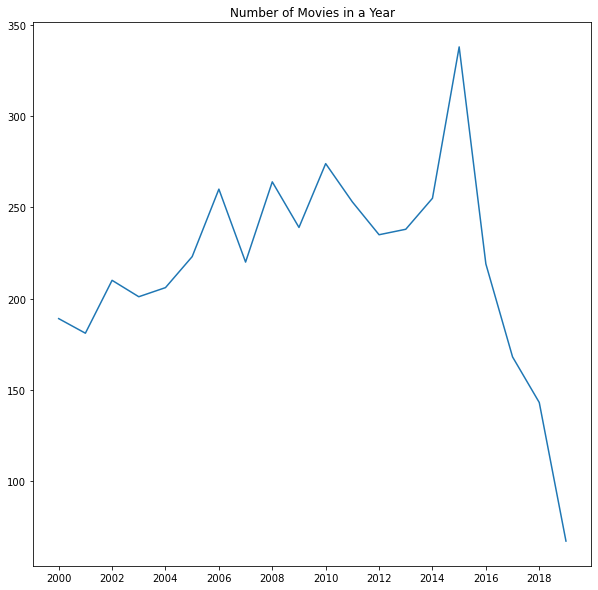

In [11]:
plt.figure(figsize=(10,10))
fig_1_0 = sns.lineplot(data=annual_totals_df['movie_count'])
plt.title('Number of Movies in a Year')
fig_1_0.set_xticks(ticks=annual_per_movie_df['year_released'][::2])
plt.show()

In [8]:
annual_per_movie_df.drop(columns=['movie_count','ticket_sales_in_mill','production_budget_in_mill','profit_in_mill','return_on_investment_%'], inplace=True)
#this is to create a new clean df with all data normalized to the number of movies made in a year


In [11]:
annual_per_movie_df

,year_released,ticket_sales_per_movie_mill,profit_per_movie,production_budget_per_movie,roi_per_movie
0,2000,39.226312,8.058386,31.167926,0.136798
1,2001,43.697066,11.162425,32.534641,0.189554
2,2002,41.835562,10.621095,31.214467,0.162029
3,2003,41.817463,9.547970,32.269493,0.147205
4,2004,44.130481,8.847461,35.283019,0.121727
5,2005,37.432260,4.055157,33.377103,0.054482
6,2006,33.384435,4.566477,28.817958,0.060946
7,2007,37.601500,4.331041,33.270459,0.059171
8,2008,35.424973,3.691841,31.733133,0.044068
9,2009,43.827460,8.215138,35.612322,0.096520


### ***Figure 1.1 Per Movie Data***

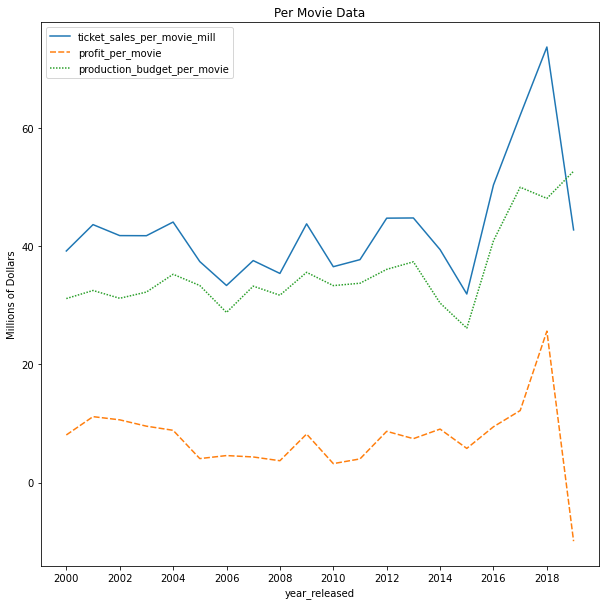

In [10]:
plt.figure(figsize=(10,10))
fig_1_1_df = annual_per_movie_df.drop(columns=['roi_per_movie'])
fig_1_1 = sns.lineplot(data=fig_1_1_df.set_index(['year_released']))
plt.title('Per Movie Data')
plt.ylabel('Millions of Dollars')
fig_1_1.set_xticks(ticks=annual_per_movie_df['year_released'][::2])
plt.show()

### Analysis of Data Aggregated by year

Figure 1.0 illustrates the number of movies that hit the movie theaters that year. As you can see the number of movies made increased rapidly from 2000-2015 and has since been in a steep downtrend. This can be for many reasons. The first could be imperfect data--perhaps this isnt all the movies that hit box office. The second--and more probable reason-- is that movies aren't hitting theaters anymore and going straight to in-demand services like Netflix. 

Figure 1.1 shows the normalized to number of movies data over the desired years. You can see in this figure how all of the variables interact with each other. The ticket sales for example shot up from 2015 to 2018 and then has fallen off steeply. While ticket sales have increased the profit per movie takes a very hard drop and actually goes negative around 2019. This is interesting because you can see the production budget spike during this time and ticket sales to fall-- which is the direct inverse of what you want to see happen. 


### ***Figure 2.0 Regression Plots of Ticket Sales, Production Budget, and Box Office Proft over time***

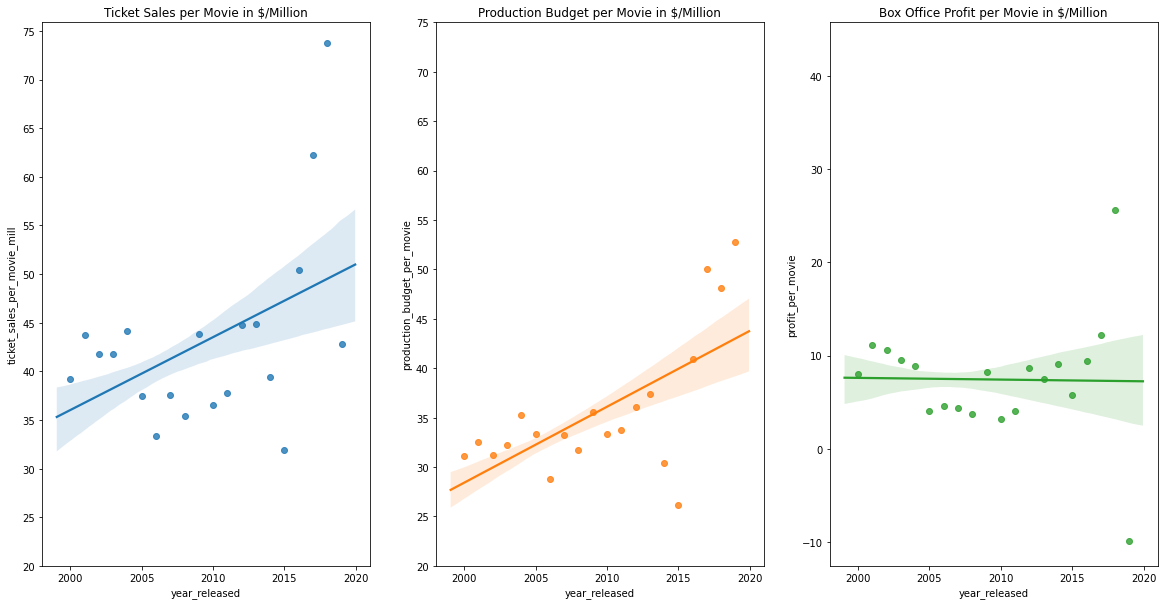

In [13]:
newfig = plt.figure(figsize = (20,10))
ax = newfig.add_subplot(131, title='Ticket Sales per Movie in $/Million')
ax2 = newfig.add_subplot(132, title='Production Budget per Movie in $/Million')
ax3 = newfig.add_subplot(133, title='Box Office Profit per Movie in $/Million')
sns.regplot(x=annual_per_movie_df['year_released'],y=annual_per_movie_df['ticket_sales_per_movie_mill'],ci=67, ax = ax)
sns.regplot(x=annual_per_movie_df['year_released'],y=annual_per_movie_df['production_budget_per_movie'],ci=67, ax = ax2)
sns.regplot(x=annual_per_movie_df['year_released'],y=annual_per_movie_df['profit_per_movie'],ci=67, ax = ax3)
ax.set_yticks(ticks=(range(20,80,5)))
ax2.set_yticks(ticks=(range(20,80,5)))
plt.show()

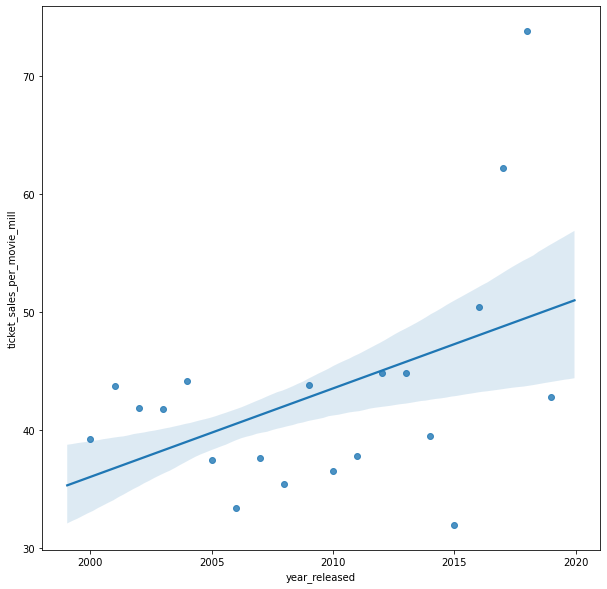

In [14]:
plt.figure(figsize=(10,10))
sns.regplot(x=annual_per_movie_df['year_released'],y=annual_per_movie_df['ticket_sales_per_movie_mill'],ci=67)
plt.show()

### ***Figure 2.1 Production Budget per movie over time***

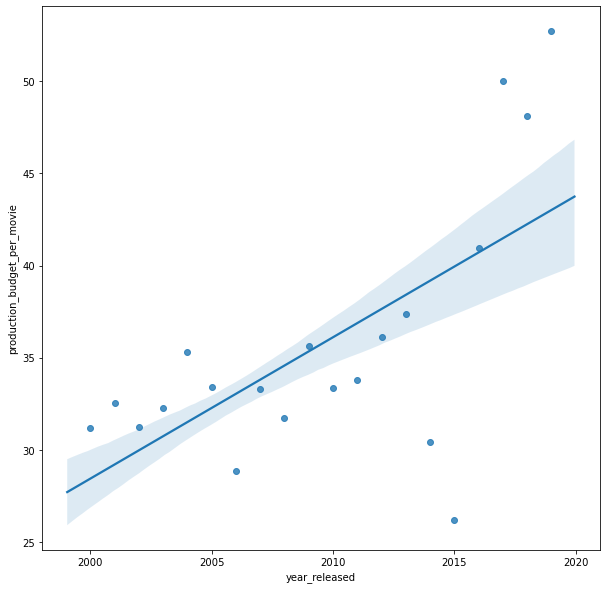

In [16]:
plt.figure(figsize=(10,10))
sns.regplot(x=annual_per_movie_df['year_released'],y=annual_per_movie_df['production_budget_per_movie'],ci=67)
plt.show()

### ***Figure 2.2 Profit per movie over time***

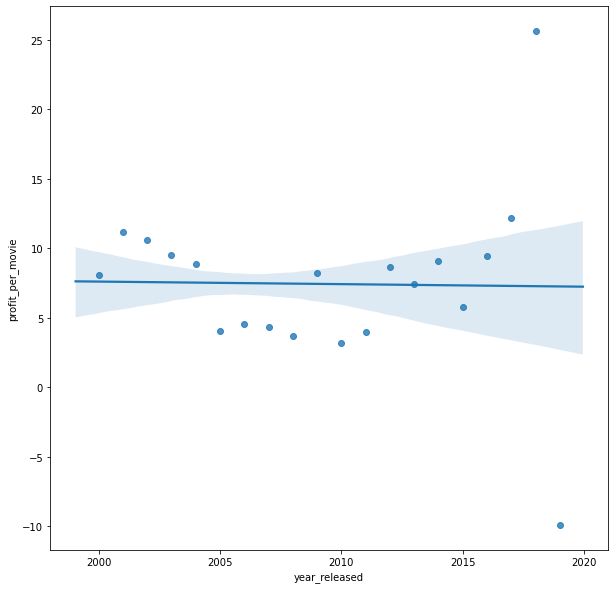

In [17]:
plt.figure(figsize=(10,10))
sns.regplot(x=annual_per_movie_df['year_released'],y=annual_per_movie_df['profit_per_movie'],ci=67)
plt.show()

### ***Figure 2.3 ROI per movie over time***

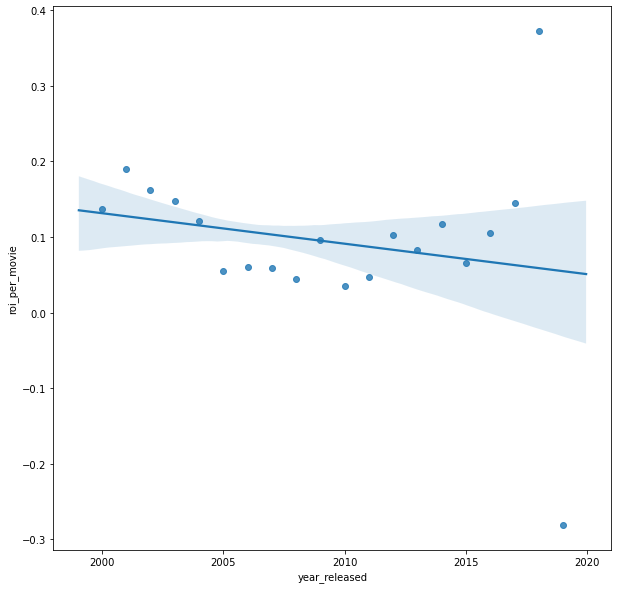

In [18]:
plt.figure(figsize=(10,10))
sns.regplot(x=annual_per_movie_df['year_released'],y=annual_per_movie_df['roi_per_movie'],ci=67)
plt.show()

### Analysis of Figures 2.X Regression Plots

Figure 2.0 - Figure 2.0 Regression Plots of Ticket Sales, Production Budget, and Box Office Proft over time
Figure 2.1 - Production Budget per movie over time
Figure 2.2 - Profit per movie over time
Figure 2.3 - ROI per movie over time

All figures 2.X are linear regression plots. This means that a line of best fit is displayed showing a relationship of the data points in the Y variable as compared to the X variable. Here the Y variables vary while the X variable is always the time period we are evaluating. A positive slope in the plotted line means that the Y variable is trending upwards over the years and a negative slot in the plotted line means that the Y variable is decreasing over the years.

Figure 2.0 is a side by side comparison of Ticket Sales, Production Budget, and Box Office Proft over time. We have the Ticket Sales and production budget on the same scale so that you can see the difference in speed of change by comparing the slopes of the regression line. 

Figure 2.1 shows the production budget over time and another positively sloped line. When viewed on the same scale in figure 2.0, it shows that the production budget line of best fit has a much steeper slope than the ticket sales over time. This means production budgets are increasing faster than the growth in ticket sales-- not a good sign. This can also be seen in Figure 1.1 where the green line (production budget) actually suprasses the blue line (ticket sales).

Figure 2.2 shows the profit per movie over time. This line of best fit is essentially flat. This means that over time the movie industry as a whole is not making any more money per movie today than it was 20 years ago. If there is one conclusion that can be drawn from this is predictability is often a good thing as it means you will have accurate information to make informed business decisions.

Figure 2.3 shows a decline in ROI per movie over time. This is not good. This means that it is getting harder every year to risk investing money in making the movies.

### ***Figure 3.0 Correlation Matrix***

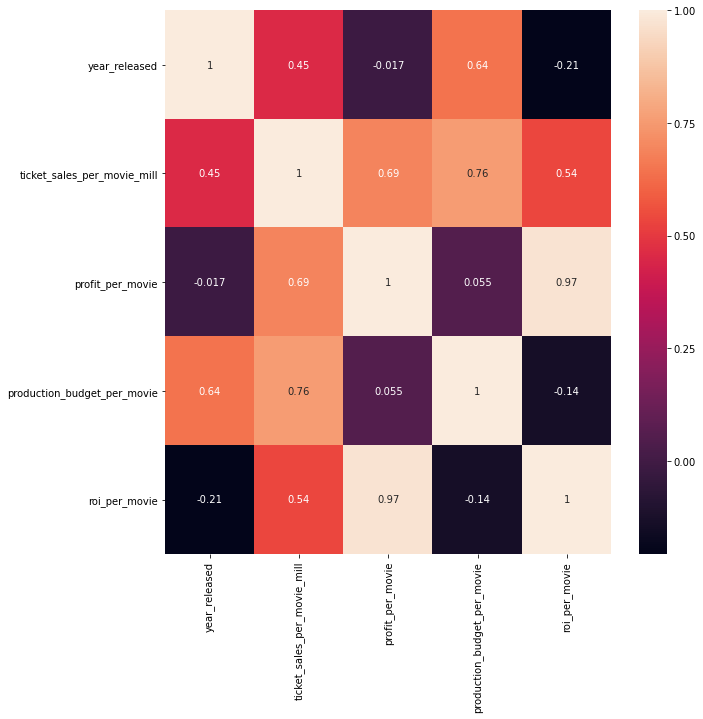

In [16]:
corrMatrix = annual_per_movie_df.corr()
plt.figure(figsize=(10, 10))
sns.heatmap(corrMatrix, annot=True)

### ***Correlation Matrix Analysis***

Figure 3.0 is a correlation matrix showing how the data in one column of the dataframe is related to another column. These values range from -1 to 1. The extreme values -1 and 1 show a perfect relationship in either a positive or negative fashion, while a correlation coeffecient value near 0 shows that these two columns don't have any relation at all.

**Interesting Finds:**

**ROI per movie & Year Released = -0.21**<br/>  This was also seen in the regression plot. This means that as the years increase the ROI per movie is decreasing at about a 1:5 ratio.

**Production Budget & ROI = -0.14**<br/>
It was not unexpected to see that the production budget to ROI relationship is negative, but it was a shock to see just how little the negative relationship is. This is saying that there is a weak negative relationship. My intuition was that obviously the higher the production budget the lower the ROI because the production budget is a huge cost. However, it seems that the higher the production budget might also generate more ticket sales.

**Production Budget & Profit = 0.05**<br/>
Very similar to the production budget & ROI, this was expected to have a negative relationship. Instead we found that production budget and profit have 0 correlation.


### Range of Outcomes

### ***Figure 4.0 Boxplot of Net Profit in Millions***

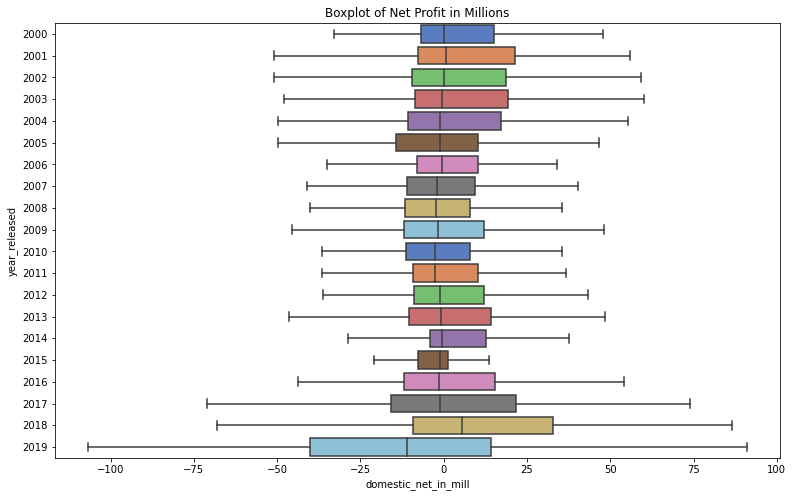

In [17]:
plt.figure(figsize=(13, 8))
sns.boxplot(df['domestic_net_in_mill'],df['year_released'], showfliers=False, orient='h', palette='muted')
plt.title('Boxplot of Net Profit in Millions')
plt.show()

### ***Figure 4.0.1 Distribution plot of Various Metrics***

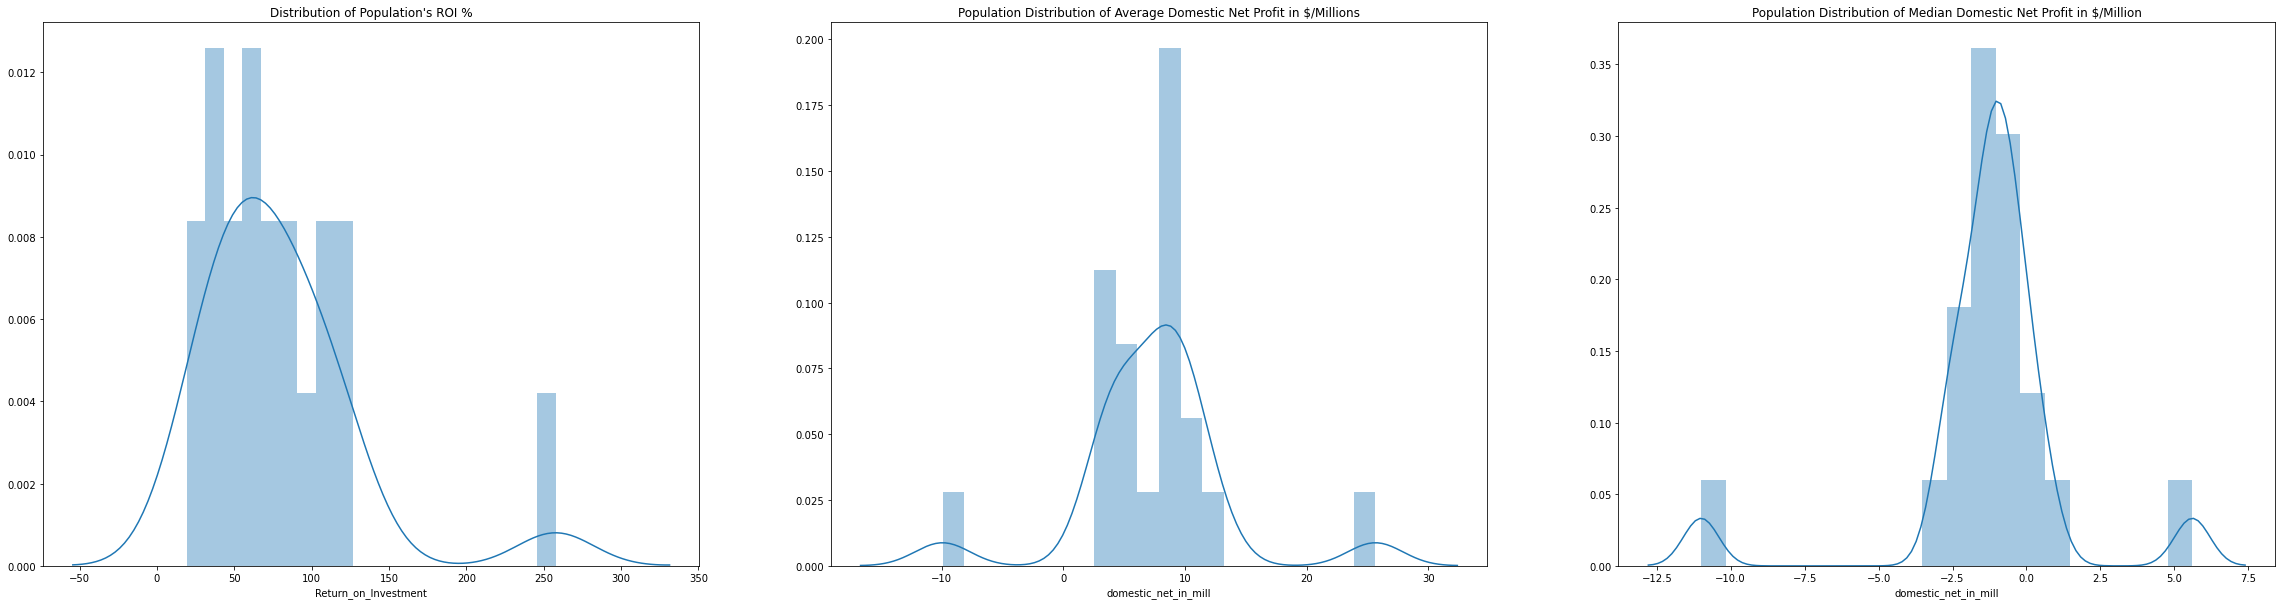

In [19]:
newfig = plt.figure(figsize = (40,10))
ax = newfig.add_subplot(131, title="Distribution of Population's ROI %")
ax2 = newfig.add_subplot(132, title='Population Distribution of Average Domestic Net Profit in $/Millions')
ax3 = newfig.add_subplot(133, title='Population Distribution of Median Domestic Net Profit in $/Million')
sns.distplot(df.groupby('year_released')['Return_on_Investment'].mean(), bins=20, ax=ax)
sns.distplot(df.groupby('year_released')['domestic_net_in_mill'].mean(),bins=20, ax=ax2)
sns.distplot(df.groupby('year_released')['domestic_net_in_mill'].median(),bins=20, ax=ax3)
plt.show()

### ***Figure 4.1 Distribution plot of ROI***

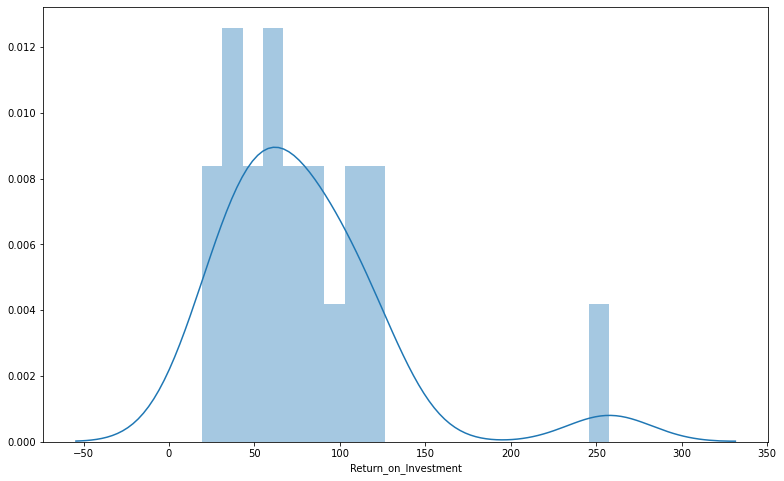

In [20]:
plt.figure(figsize=(13, 8))
sns.distplot(df.groupby('year_released')['Return_on_Investment'].mean(), bins=20)
plt.show()

### ***Figure 4.2 Distribution of Domestic Net Profit in Millions***

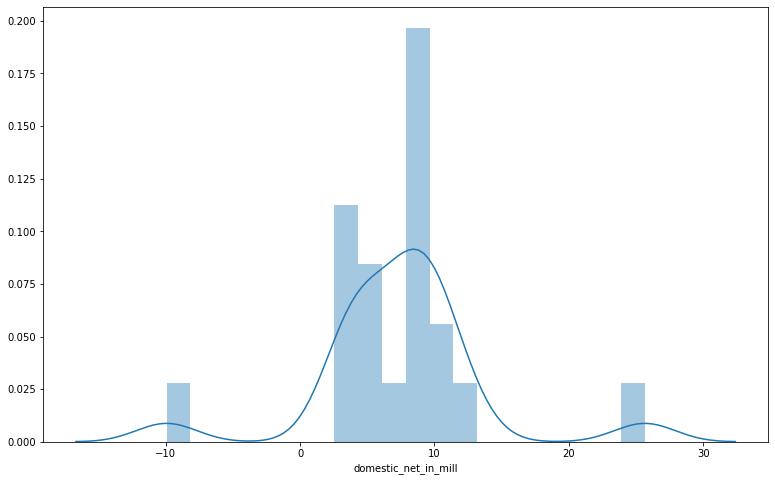

In [21]:
plt.figure(figsize=(13, 8))
sns.distplot(df.groupby('year_released')['domestic_net_in_mill'].mean(),bins=20)
plt.show()

### ***Figure 4.3 Distribution of Median ROI***

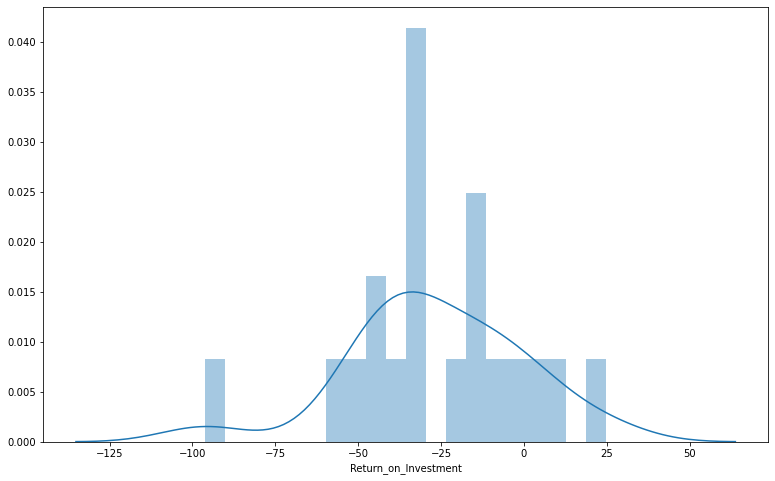

In [22]:
plt.figure(figsize=(13, 8))
sns.distplot(df.groupby('year_released')['Return_on_Investment'].median(),bins=20)
plt.show()

### ***Figure 4.4 Distribution of Median Domestic Net Profit***

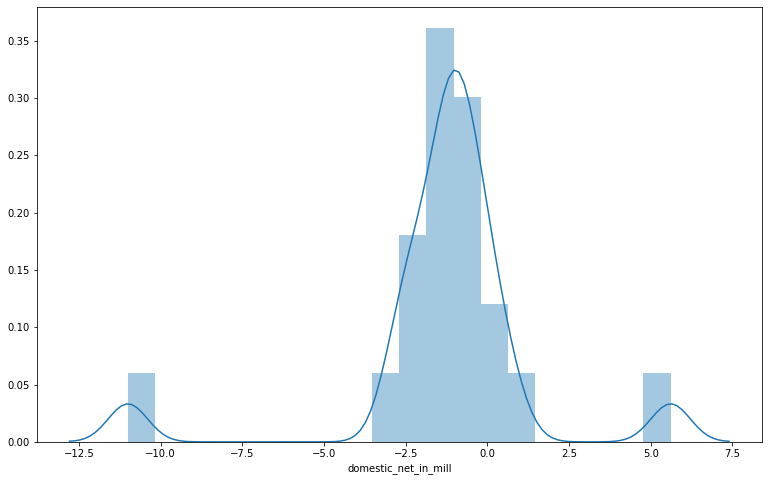

In [23]:
plt.figure(figsize=(13, 8))
sns.distplot(df.groupby('year_released')['domestic_net_in_mill'].median(),bins=20)
plt.show()

### ***Analysis of Figures 4.X***

**Figure 4.0 Boxplot of Net Profit in Millions** <br/> 
This figure shows a lot of information in a very condensed form. The body of the box shows the range of Net Profit for 50% of the data population and the line inside the box shows the median of the data. The whiskers on a normally distributed box plot demonstrate the values of 2.698 times the standard deviation and accounts for 99.3% of the data population. This is not a very clean distribution so the 2.698 times standard deviation will most likely account for a little less than 99.3% of the population.The longer the whiskers the more uncertain the outcome which is not good when trying to mitigate risk.

It should be noted that risk is not always a bad thing. If I mention left tail risk it means risk of losing money while right tail risk means higher reward possibility.

**Figure 4.1 Distribution of ROI**<br/>
This figure shows the distribution of the average return on investment for a movie in the 20 year timeframe we selected. The distirbution is fairly normalized around 50%. There seems to be a significant amount of right tail risk skewing the mean results. We know from previous data the median ROI for this same data is about 21% and the average of this entire data set is 23%. This distribution plot may not be the most useful.

**Figure 4.2 Distribution of Domestic Net Profit in Millions**<br/>
This figure shows the average profit per movie per year in millions. The KDE shows a distribution that looks relatively normal with a left shoulder and a right shoulder indicating two tail risk. 

**Figure 4.3 Distribution of Median ROI**<br/>
Looking at the median data tells a much scarier story when looking at return. This was also seen in the boxplot of net profits showing that the median ROI per year is near or ever below 0 indicating a loss. The outcomes are still very wide in rage, but this figure show us that chances are your movie will not make money in the domestic box office.

**Figure 4.4 Distribution of Median Domestic Net Profit**<br/>
Very similar picture as figure 4.3--scary. This shows that most movies do not make any profit and most actually lose money. 

# Conclusion

### ***Revisiting the Purpose*** <br/>
Microsoft sees all the big companies creating original video content, and they want to get in on the fun. They have decided to create a new movie studio, but the problem is they don’t know anything about creating movies. They have hired you to help them better understand the movie industry.

Your team is charged with doing data analysis and creating a presentation that explores what type of films are currently doing the best at the box office. You must then translate those findings into actionable insights that the CEO can use when deciding what type of films they should be creating.


### ***Analysis Theory***<br/>
Firstly, before even evaluating how to produce great content, we must make sure the movie industry is showing healthy economic fundamentals. To evaluate if the movie industry is a healthy industry we will aim to answer the questions proposed in the beginning of this notebook.

#### **1. Are ticket sales growing since 2000?**<br/>
Figure 1.1 answers this question pretty plainly looking at the blue line representing ticket sales. Ticket sales shows an unicumbered picture of the demand for the movies created that year. From 2000 to 2015 ticket sales were not growing until a crazy spike going around 2018. Ticket sales after 2019 have declined dramatically after an impressive 2018 back to the same levels they were at the entire 2 decades we evaluated. However, when we look at a per movie basis in Figure 2.1 we can see that there is growth of about \\$15 million dollars in ticket sales per movie. However, When you take inflation into account \\$1 in 2000 is worth \\$1.50 today. Since our growth in ticket sales per movie was less than the 50\% increase in inflation ticket sales have actually dropped.***There is no observable growth in demand from 2000 to 2019 for the movie industry as a whole.***


#### **2. Are movies making more or less profit since 2000?**<br/>
This question is easily answerable looking at Figure 1.1, Figure 2.2, and Figure 3.0. Looking at Figure 2.2 we see the relationship of profit per movie over time with a line of best fit plotted showing the trend. The slope is flat to barely negative. Figure 3.0 shows the correlation coefficient between profit per movie and the year it was released is -0.17. This also shows there is a negligible negative correlation to the year it was released and the profit of the movie. ***This shows that movies are not becoming more profitable over time.*** 


#### **3. Are movies getting more expensive to make since 2000?**<br/>
Similarly to question 2 lets look at Figure 2.1 and Figure 3.0. Figure 2.1 shows production budgets per movie over time. The line of best fit is showing a steep ascent which means that productions budgets have been growing as the years passed. Figure 3.0 shows the correlation coefficient between these two variables is 0.64. This is proof of a strong positive correlation of these values as the years go on the production budgets also increase. ***This shows that movies are becoming increasingly expensive to make over time.***


#### 4. Does a larger production budget increase your chances of producing a profitable movie? <br/>
Figure 3.0 measures the correlation between multiple variables including production budget and profit per movie and ROI. The values for production budget vs profit is 0.055 and production budget vs ROI is -0.14. This means that while production budget does have a little effect on ticket sales the increased cost in the budget is greater therefore hurting your return metrics. ***This shows that a larger production budget has no change to your profit and actually will hurt your return metrics.***

## Summary
In summary, on this data I would not recommend entering the movie industry as an inexperienced content creator. The majority of movies are not doing well and there is an extremely wide range in possible outcomes. That being said, I believe this data is leaving out a major part of the revenue stream for movies in the on demand market. If we had data on the income generated from on demand services such as Netflix it may shed a much more positive light on becoming a content creator.
